## Klasifikasi Berita

#### Nama  : Dohan Rizqi Hadityo

#### NIM   : 210411100195

#### Kelas : Pencarian dan Penambangan Web A

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
import csv

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

# URL halaman indeks berita
base_url = "https://indeks.kompas.com/?page="

# Menyimpan hasil scraping
data_berita = []

# Menyimpan jumlah data yang sudah diambil per kategori
kategori_berita = {
    'tren': 0,
    'global': 0
}

# Maksimal artikel per kategori
maks_per_kategori = 100

# Batas waktu (17 Agustus - 6 September 2024)
tanggal_batas_atas = datetime.strptime("25-09-2024", "%d-%m-%Y")
tanggal_batas_bawah = datetime.strptime("18-09-2024", "%d-%m-%Y")

# Mengambil artikel dari beberapa halaman
page = 1
while sum(kategori_berita.values()) < 250 and page <= 500:  # Memperluas hingga 500 halaman jika diperlukan
    indeks_url = f"{base_url}{page}"
    page_response = requests.get(indeks_url)
    
    # Cek apakah request sukses atau gagal
    if page_response.status_code == 200:
        soup_page = BeautifulSoup(page_response.text, 'html.parser')
        artikel_items = soup_page.find_all('div', class_='articleItem')

        # Cek apakah ada artikel di halaman tersebut
        if artikel_items:
            # Looping setiap artikel
            for artikel in artikel_items:
                link_artikel = artikel.find('a', class_='article-link')
                judul_artikel = artikel.find('h2', class_='articleTitle')
                kategori_artikel = artikel.find('div', class_='articlePost-subtitle')
                tanggal_artikel = artikel.find('div', class_='articlePost-date')

                # Cek apakah semua elemen artikel ditemukan
                if link_artikel and judul_artikel and kategori_artikel and tanggal_artikel:
                    artikel_link = link_artikel['href']
                    judul_artikel = judul_artikel.get_text().strip()
                    kategori_artikel = kategori_artikel.get_text().strip().lower()  # Ubah kategori ke huruf kecil untuk perbandingan
                    tanggal_artikel = tanggal_artikel.get_text().strip()

                    # Parsing tanggal artikel
                    try:
                        tanggal_parsed = datetime.strptime(tanggal_artikel, "%d/%m/%Y")
                    except ValueError:
                        print(f"Format tanggal tidak dikenali: {tanggal_artikel}")
                        continue

                    # Hanya lanjutkan jika artikel berada di rentang waktu yang ditentukan
                    if tanggal_batas_bawah <= tanggal_parsed <= tanggal_batas_atas:
                        # Hanya ambil jika kategori termasuk yang kita inginkan dan belum mencapai 50 per kategori
                        if kategori_artikel in kategori_berita and kategori_berita[kategori_artikel] < maks_per_kategori:
                            # Mendapatkan isi artikel dari halaman artikel
                            artikel_response = requests.get(artikel_link)
                            
                            # Cek apakah request sukses
                            if artikel_response.status_code == 200:
                                artikel_soup = BeautifulSoup(artikel_response.text, 'html.parser')
                                paragraf_isi = artikel_soup.find('div', class_='read__content').find_all('p')
                                
                                # Cek apakah konten ditemukan
                                if paragraf_isi:
                                    isi_artikel = ' '.join([p.get_text().strip() for p in paragraf_isi])
                                else:
                                    isi_artikel = 'Konten tidak tersedia'

                                # Menyimpan data ke dalam list
                                data_berita.append([judul_artikel, isi_artikel, tanggal_artikel, kategori_artikel])
                                kategori_berita[kategori_artikel] += 1

                                # Berhenti jika sudah mencapai 250 data (50 per kategori x 5 kategori)
                                if sum(kategori_berita.values()) >= 250:
                                    break
                            else:
                                print(f"Error saat mengambil artikel: {artikel_link}")
                    else:
                        # Jika tanggal artikel di luar rentang, abaikan
                        continue
                else:
                    print(f"Artikel tidak lengkap di halaman {page}")
        else:
            print(f"Tidak ada artikel di halaman {page}")

    else:
        print(f"Error mengambil halaman {page}")
    
    # Naikkan nomor halaman
    page += 1

# Mengonversi data ke dalam DataFrame
df_berita = pd.DataFrame(data_berita, columns=['Judul Berita', 'Isi Berita', 'Tanggal Berita', 'Kategori Berita'])

# Menambahkan kolom penomoran
df_berita.insert(0, 'No', range(1, 1 + len(df_berita)))

# Menampilkan DataFrame
print(df_berita.head())

# Menampilkan jumlah artikel per kategori
jumlah_per_kategori = df_berita['Kategori Berita'].value_counts()
print(jumlah_per_kategori)


   No                                       Judul Berita  \
0   1  Banyak Serangga Keluar dari Tempat Pengembalia...   
1   2  Benarkah Petir Bisa Menyambar Lebih dari Sekal...   
2   3  Studi: Dampak Jangka Panjang Covid-19 pada Ota...   
3   4  Bukan Sunita Williams, Ini 2 Astronot yang Tin...   
4   5  Balas Serangan Israel, Hizbullah Klaim Tembakk...   

                                          Isi Berita Tanggal Berita  \
0  DETROIT, KOMPAS.com - Sebuah perpustakaan di p...     25/09/2024   
1  KOMPAS.com - Unggahan di media sosial menyebut...     25/09/2024   
2  KOMPAS.com - Penelitian baru mengungkapkan, or...     25/09/2024   
3  KOMPAS.com - Dua astronot Badan Penerbangan da...     25/09/2024   
4  KOMPAS.com - Kelompok Hizbullah mengeklaim ber...     25/09/2024   

  Kategori Berita  
0          global  
1            tren  
2            tren  
3            tren  
4            tren  
Kategori Berita
global    100
tren      100
Name: count, dtype: int64


In [3]:
df_berita

NameError: name 'df_berita' is not defined

In [14]:
# Mengonversi data ke dalam DataFrame
df_berita = pd.DataFrame(data_berita, columns=['Judul Berita', 'Isi Berita', 'Tanggal Berita', 'Kategori Berita'])

# Menambahkan kolom penomoran
df_berita.insert(0, 'No', range(1, 1 + len(df_berita)))

# Menghitung jumlah artikel berdasarkan kategori
jumlah_per_kategori = df_berita['Kategori Berita'].value_counts()

# Menampilkan hasil perhitungan
print(jumlah_per_kategori)


Kategori Berita
global    100
tren      100
Name: count, dtype: int64


In [24]:
csv_filename = "berita_kompas_sample.csv"
df_berita.to_csv(csv_filename, index=False, encoding='utf-8')

print(f"Data berita telah disimpan ke {csv_filename}")

Data berita telah disimpan ke berita_kompas_sample.csv


In [22]:
import string
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv("berita_kompas_sample.csv", sep=',', encoding='latin1')
df.head(5)

,No,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
0,1,Banyak Serangga Keluar dari Tempat Pengembalia...,"DETROIT, KOMPAS.com - Sebuah perpustakaan di p...",25/09/2024,global
1,2,Benarkah Petir Bisa Menyambar Lebih dari Sekal...,KOMPAS.com - Unggahan di media sosial menyebut...,25/09/2024,tren
2,3,Studi: Dampak Jangka Panjang Covid-19 pada Ota...,"KOMPAS.comÂ -Â Penelitian baru mengungkapkan, ...",25/09/2024,tren
3,4,"Bukan Sunita Williams, Ini 2 Astronot yang Tin...",KOMPAS.com - Dua astronot Badan Penerbangan da...,25/09/2024,tren
4,5,"Balas Serangan Israel, Hizbullah Klaim Tembakk...",KOMPAS.com - Kelompok Hizbullah mengeklaim ber...,25/09/2024,tren


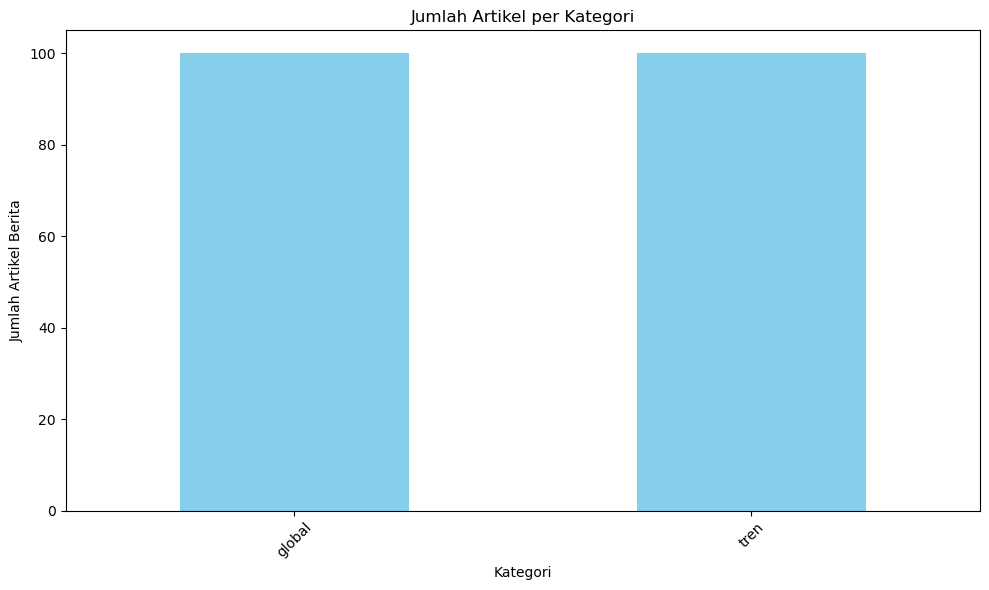

In [142]:
# Hitung jumlah artikel per kategori
category_counts = df['Kategori Berita'].value_counts()

# Tampilkan grafik batang
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Artikel per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Artikel Berita')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
df = pd.read_csv('berita_kompas_sample.csv')

In [94]:
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [66]:
# Proses case folding
def casefolding(Isi_Berita):
    Isi_Berita = Isi_Berita.lower()  # Pastikan nama variabel konsisten
    return Isi_Berita

# Simpan kolom asli sebelum diubah menjadi lowercase
df['Isi Berita'] = df['Isi Berita']

# Terapkan fungsi casefolding pada kolom 'Isi Berita'
df['Lowercase'] = df['Isi Berita'].apply(casefolding)

# Menampilkan 5 baris pertama
df[['Isi Berita', 'Lowercase']]

,Isi Berita,Lowercase
0,"DETROIT, KOMPAS.com - Sebuah perpustakaan di p...","detroit, kompas.com - sebuah perpustakaan di p..."
1,KOMPAS.com - Unggahan di media sosial menyebut...,kompas.com - unggahan di media sosial menyebut...
2,"KOMPAS.com - Penelitian baru mengungkapkan, or...","kompas.com - penelitian baru mengungkapkan, or..."
3,KOMPAS.com - Dua astronot Badan Penerbangan da...,kompas.com - dua astronot badan penerbangan da...
4,KOMPAS.com - Kelompok Hizbullah mengeklaim ber...,kompas.com - kelompok hizbullah mengeklaim ber...
...,...,...
195,"WASHINGTON DC, KOMPAS.com - Dalam sebuah upaca...","washington dc, kompas.com - dalam sebuah upaca..."
196,"KUALA LUMPUR, KOMPAS.com - Polisi Malaysia men...","kuala lumpur, kompas.com - polisi malaysia men..."
197,"KYIV, KOMPAS.com - Masih ada beberapa hal baru...","kyiv, kompas.com - masih ada beberapa hal baru..."
198,"KYIV, KOMPAS.com - Volodymyr Zelensky mendesak...","kyiv, kompas.com - volodymyr zelensky mendesak..."


In [84]:
# Proses cleansing
def cleansing(Isi_Berita):
    # Menghapus whitespace di awal dan akhir teks
    Isi_Berita = Isi_Berita.strip()
    
    # Menghapus tanda baca dan karakter khusus
    Isi_Berita = re.sub(f"[{string.punctuation}]", '', Isi_Berita)
    
    # Menghapus angka
    Isi_Berita = re.sub(r'\d+', '', Isi_Berita)
    
    # Menghapus huruf tunggal (opsional, tergantung kebutuhan)
    Isi_Berita = re.sub(r"\b[a-zA-Z]\b", "", Isi_Berita)
    
    # Menghapus karakter-karakter non-standar seperti â
    Isi_Berita = re.sub(r'[^\x00-\x7F]+', '', Isi_Berita)
    
    # Menghapus spasi ganda
    Isi_Berita = re.sub(r'\s+', ' ', Isi_Berita)
    
    return Isi_Berita

# Terapkan fungsi casefolding pada kolom 'Isi Berita'
df['Lowercase'] = df['Isi Berita'].apply(casefolding)

# Terapkan fungsi cleansing pada kolom 'Isi Berita'
df['Cleansing'] = df['Lowercase'].apply(cleansing)

# Menampilkan 5 baris pertama dengan kolom 'Lowercase' dan 'Cleansing'
df[['Lowercase', 'Cleansing']]

,Lowercase,Cleansing
0,"detroit, kompas.com - sebuah perpustakaan di p...",detroit kompascom sebuah perpustakaan di pingg...
1,kompas.com - unggahan di media sosial menyebut...,kompascom unggahan di media sosial menyebut pe...
2,"kompas.com - penelitian baru mengungkapkan, or...",kompascompenelitian baru mengungkapkan orang y...
3,kompas.com - dua astronot badan penerbangan da...,kompascom dua astronot badan penerbangan dan a...
4,kompas.com - kelompok hizbullah mengeklaim ber...,kompascom kelompok hizbullah mengeklaim berhas...
...,...,...
195,"washington dc, kompas.com - dalam sebuah upaca...",washington dc kompascom dalam sebuah upacara p...
196,"kuala lumpur, kompas.com - polisi malaysia men...",kuala lumpur kompascom polisi malaysia mengumu...
197,"kyiv, kompas.com - masih ada beberapa hal baru...",kyiv kompascom masih ada beberapa hal baru yan...
198,"kyiv, kompas.com - volodymyr zelensky mendesak...",kyiv kompascom volodymyr zelensky mendesak joe...


In [86]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
# Tokenisasi menggunakan NLTK
def word_tokenize_wrapper(text):
    return word_tokenize(text)

# Terapkan tokenisasi pada kolom 'cleaned_text'
df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize_wrapper)

# Menampilkan kolom 'cleaned_text' dan 'tokenized_text'
df[['cleaned_text', 'tokenized_text']]

,cleaned_text,tokenized_text
0,detroit kompascom sebuah perpustakaan di pingg...,"[detroit, kompascom, sebuah, perpustakaan, di,..."
1,kompascom unggahan di media sosial menyebut pe...,"[kompascom, unggahan, di, media, sosial, menye..."
2,kompascom penelitian baru mengungkapkan orang ...,"[kompascom, penelitian, baru, mengungkapkan, o..."
3,kompascom dua astronot badan penerbangan dan a...,"[kompascom, dua, astronot, badan, penerbangan,..."
4,kompascom kelompok hizbullah mengeklaim berhas...,"[kompascom, kelompok, hizbullah, mengeklaim, b..."
...,...,...
195,washington dc kompascom dalam sebuah upacara p...,"[washington, dc, kompascom, dalam, sebuah, upa..."
196,kuala lumpur kompascom polisi malaysia mengumu...,"[kuala, lumpur, kompascom, polisi, malaysia, m..."
197,kyiv kompascom masih ada beberapa hal baru yan...,"[kyiv, kompascom, masih, ada, beberapa, hal, b..."
198,kyiv kompascom volodymyr zelensky mendesak joe...,"[kyiv, kompascom, volodymyr, zelensky, mendesa..."


In [90]:
# Menghapus stopwords
stop_words = set(stopwords.words('indonesian'))

# Terapkan penghapusan stopwords
df['no_stopwords_text'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Menampilkan kolom 'tokenized_text' dan 'no_stopwords_text'
df[['tokenized_text', 'no_stopwords_text']]

,tokenized_text,no_stopwords_text
0,"[detroit, kompascom, sebuah, perpustakaan, di,...","[detroit, kompascom, perpustakaan, pinggiran, ..."
1,"[kompascom, unggahan, di, media, sosial, menye...","[kompascom, unggahan, media, sosial, menyebut,..."
2,"[kompascom, penelitian, baru, mengungkapkan, o...","[kompascom, penelitian, orang, dirawat, rumah,..."
3,"[kompascom, dua, astronot, badan, penerbangan,...","[kompascom, astronot, badan, penerbangan, anta..."
4,"[kompascom, kelompok, hizbullah, mengeklaim, b...","[kompascom, kelompok, hizbullah, mengeklaim, b..."
...,...,...
195,"[washington, dc, kompascom, dalam, sebuah, upa...","[washington, dc, kompascom, upacara, sabtu, so..."
196,"[kuala, lumpur, kompascom, polisi, malaysia, m...","[kuala, lumpur, kompascom, polisi, malaysia, m..."
197,"[kyiv, kompascom, masih, ada, beberapa, hal, b...","[kyiv, kompascom, mewarnai, perang, rusiaukrai..."
198,"[kyiv, kompascom, volodymyr, zelensky, mendesa...","[kyiv, kompascom, volodymyr, zelensky, mendesa..."


In [98]:
# Stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Terapkan stemming pada kolom 'no_stopwords_text'
df['stemmed_text'] = df['no_stopwords_text'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
df['final_text'] = df['stemmed_text'].apply(lambda x: ' '.join(x))

# Menampilkan kolom 'no_stopwords_text' dan 'final_text'
df[['no_stopwords_text', 'final_text']]

,no_stopwords_text,final_text
0,"[detroit, kompascom, perpustakaan, pinggiran, ...",detroit kompascom pustaka pinggir kota detroit...
1,"[kompascom, unggahan, media, sosial, menyebut,...",kompascom unggah media sosial sebut petir samb...
2,"[kompascom, penelitian, orang, dirawat, rumah,...",kompascom teliti orang rawat rumah sakit infek...
3,"[kompascom, astronot, badan, penerbangan, anta...",kompascom astronot badan terbang antariksa ame...
4,"[kompascom, kelompok, hizbullah, mengeklaim, b...",kompascom kelompok hizbullah klaim hasil seran...
...,...,...
195,"[washington, dc, kompascom, upacara, sabtu, so...",washington dc kompascom upacara sabtu sore ang...
196,"[kuala, lumpur, kompascom, polisi, malaysia, m...",kuala lumpur kompascom polisi malaysia umum ta...
197,"[kyiv, kompascom, mewarnai, perang, rusiaukrai...",kyiv kompascom warna perang rusiaukraina sabtu...
198,"[kyiv, kompascom, volodymyr, zelensky, mendesa...",kyiv kompascom volodymyr zelensky desak joe bi...


In [209]:
# Menyimpan kolom 'no_stopwords_text' dan 'final_text' dari DataFrame df ke dalam file CSV
df[['no_stopwords_text', 'final_text']].to_csv('hasil_stemming_stopwords.csv', index=False)

# Menampilkan pesan konfirmasi bahwa hasil telah berhasil disimpan
print("Hasil berhasil disimpan ke 'hasil_stemming_stopwords.csv'")

Hasil berhasil disimpan ke 'hasil_stemming_stopwords.csv'


In [150]:
# Menghapus kolom 'Kategori Berita' dari DataFrame df dan menyimpan hasilnya di variabel X
X = df.drop(columns='Kategori Berita')

# Menyimpan kolom 'Kategori Berita' ke dalam variabel Y sebagai target untuk model
Y = df['Kategori Berita']


In [152]:
# Membuat objek LabelEncoder untuk mengubah kategori berita menjadi format numerik
label_encoder = LabelEncoder()

# Melakukan fitting dan transformasi pada kolom 'Kategori Berita' dan menyimpan hasilnya kembali ke kolom yang sama
df['Kategori Berita'] = label_encoder.fit_transform(df['Kategori Berita'])

# Menampilkan pesan untuk menunjukkan bahwa proses encoding telah dilakukan
print("\nEncoded Labels:")

# Menampilkan DataFrame df untuk melihat hasil encoding
df



Encoded Labels:


,No,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita,Lowercase,Cleansing,lower_text,cleaned_text,tokenized_text,no_stopwords_text,stemmed_text,final_text
0,1,Banyak Serangga Keluar dari Tempat Pengembalia...,"DETROIT, KOMPAS.com - Sebuah perpustakaan di p...",25/09/2024,0,"detroit, kompas.com - sebuah perpustakaan di p...",detroit kompascom sebuah perpustakaan di pingg...,"detroit, kompas.com - sebuah perpustakaan di p...",detroit kompascom sebuah perpustakaan di pingg...,"[detroit, kompascom, sebuah, perpustakaan, di,...","[detroit, kompascom, perpustakaan, pinggiran, ...","[detroit, kompascom, pustaka, pinggir, kota, d...",detroit kompascom pustaka pinggir kota detroit...
1,2,Benarkah Petir Bisa Menyambar Lebih dari Sekal...,KOMPAS.com - Unggahan di media sosial menyebut...,25/09/2024,1,kompas.com - unggahan di media sosial menyebut...,kompascom unggahan di media sosial menyebut pe...,kompas.com - unggahan di media sosial menyebut...,kompascom unggahan di media sosial menyebut pe...,"[kompascom, unggahan, di, media, sosial, menye...","[kompascom, unggahan, media, sosial, menyebut,...","[kompascom, unggah, media, sosial, sebut, peti...",kompascom unggah media sosial sebut petir samb...
2,3,Studi: Dampak Jangka Panjang Covid-19 pada Ota...,"KOMPAS.com - Penelitian baru mengungkapkan, or...",25/09/2024,1,"kompas.com - penelitian baru mengungkapkan, or...",kompascompenelitian baru mengungkapkan orang y...,"kompas.com - penelitian baru mengungkapkan, or...",kompascom penelitian baru mengungkapkan orang ...,"[kompascom, penelitian, baru, mengungkapkan, o...","[kompascom, penelitian, orang, dirawat, rumah,...","[kompascom, teliti, orang, rawat, rumah, sakit...",kompascom teliti orang rawat rumah sakit infek...
3,4,"Bukan Sunita Williams, Ini 2 Astronot yang Tin...",KOMPAS.com - Dua astronot Badan Penerbangan da...,25/09/2024,1,kompas.com - dua astronot badan penerbangan da...,kompascom dua astronot badan penerbangan dan a...,kompas.com - dua astronot badan penerbangan da...,kompascom dua astronot badan penerbangan dan a...,"[kompascom, dua, astronot, badan, penerbangan,...","[kompascom, astronot, badan, penerbangan, anta...","[kompascom, astronot, badan, terbang, antariks...",kompascom astronot badan terbang antariksa ame...
4,5,"Balas Serangan Israel, Hizbullah Klaim Tembakk...",KOMPAS.com - Kelompok Hizbullah mengeklaim ber...,25/09/2024,1,kompas.com - kelompok hizbullah mengeklaim ber...,kompascom kelompok hizbullah mengeklaim berhas...,kompas.com - kelompok hizbullah mengeklaim ber...,kompascom kelompok hizbullah mengeklaim berhas...,"[kompascom, kelompok, hizbullah, mengeklaim, b...","[kompascom, kelompok, hizbullah, mengeklaim, b...","[kompascom, kelompok, hizbullah, klaim, hasil,...",kompascom kelompok hizbullah klaim hasil seran...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Angkatan Laut AS Minta Maaf atas Penghancuran ...,"WASHINGTON DC, KOMPAS.com - Dalam sebuah upaca...",22/09/2024,0,"washington dc, kompas.com - dalam sebuah upaca...",washington dc kompascom dalam sebuah upacara p...,"washington dc, kompas.com - dalam sebuah upaca...",washington dc kompascom dalam sebuah upacara p...,"[washington, dc, kompascom, dalam, sebuah, upa...","[washington, dc, kompascom, upacara, sabtu, so...","[washington, dc, kompascom, upacara, sabtu, so...",washington dc kompascom upacara sabtu sore ang...
196,197,Polisi Malaysia Tangkap 355 Orang terkait Kasu...,"KUALA LUMPUR, KOMPAS.com - Polisi Malaysia men...",22/09/2024,0,"kuala lumpur, kompas.com - polisi malaysia men...",kuala lumpur kompascom polisi malaysia mengumu...,"kuala lumpur, kompas.com - polisi malaysia men...",kuala lumpur kompascom polisi malaysia mengumu...,"[kuala, lumpur, kompascom, polisi, malaysia, m...","[kuala, lumpur, kompascom, polisi, malaysia, m...","[kuala, lumpur, kompascom, polisi, malaysia, u...",kuala lumpur kompascom polisi malaysia umum ta...
197,198,Rangkuman Hari Ke-941 Serangan Rusia ke Ukrain...,"KYIV, KOMPAS.com - Masih ada

In [154]:
# Mengambil nilai dari kolom 'Isi Berita' sebagai array dan menyimpannya ke variabel x
x = df['Isi Berita'].values

# Mengambil nilai dari kolom 'Kategori Berita' sebagai array dan menyimpannya ke variabel y
y = df['Kategori Berita'].values


In [156]:
# Memisahkan data menjadi set pelatihan dan set pengujian
# 80% data digunakan untuk pelatihan (Xtrain, Ytrain) dan 20% untuk pengujian (Xtest, Ytest)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=2)


In [158]:
# Membuat objek TfidfVectorizer untuk mengubah teks menjadi representasi numerik berbasis TF-IDF
vect = TfidfVectorizer()

# Menggunakan fit_transform untuk menerapkan TfidfVectorizer pada data isi berita (x)
# dan menyimpan hasilnya ke dalam variabel X
X = vect.fit_transform(x)

# Menggunakan transform untuk menerapkan TfidfVectorizer pada data isi berita (x) yang sama
# Hasilnya disimpan ke dalam variabel X_array, biasanya digunakan untuk data baru
X_array = vect.transform(x)


In [160]:
# Mengonversi representasi sparse matrix dari X_array menjadi array NumPy dan mencetaknya
print(X_array.toarray())


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01786342 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04701074 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [162]:
# Mengambil nama fitur kata (token) dari TfidfVectorizer dan menyimpannya dalam variabel fitur_kata
fitur_kata = vect.get_feature_names_out()

# Mencetak jumlah fitur kata yang dihasilkan dari proses TF-IDF
print("Jumlah fitur kata dari hasil TF-IDF:", len(fitur_kata))


Jumlah fitur kata dari hasil TF-IDF: 8370


In [164]:
# Menghitung cosine similarity antara semua dokumen dalam matriks TF-IDF X
cosine_sim = cosine_similarity(X)

# Menyusun DataFrame untuk menampilkan hasil cosine similarity
# Indeks dan kolom menggunakan kategori berita dari DataFrame df
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Kategori Berita'], columns=df['Kategori Berita'])

# Menampilkan beberapa baris pertama dari matriks cosine similarity
print(cosine_sim_df.head())


Kategori Berita         0         1         1         1         1         1  \
Kategori Berita                                                               
0                1.000000  0.048859  0.041725  0.054543  0.060915  0.016811   
1                0.048859  1.000000  0.051831  0.054971  0.051790  0.034080   
1                0.041725  0.051831  1.000000  0.057424  0.050522  0.027779   
1                0.054543  0.054971  0.057424  1.000000  0.070569  0.018603   
1                0.060915  0.051790  0.050522  0.070569  1.000000  0.026193   

Kategori Berita         0         1         0         0  ...         0  \
Kategori Berita                                          ...             
0                0.059271  0.030596  0.066185  0.037127  ...  0.069144   
1                0.038075  0.045964  0.062490  0.042489  ...  0.062998   
1                0.058663  0.045030  0.066893  0.056757  ...  0.064427   
1                0.069676  0.043693  0.079414  0.050899  ...  0.086362   
1 

In [166]:
# Mengimpor modul pickle untuk menyimpan objek Python ke dalam file
import pickle

# Menyimpan objek TfidfVectorizer yang telah dibuat sebelumnya (vect) ke dalam file
# Menggunakan mode 'wb' untuk menulis dalam format biner
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vect, f)


In [168]:
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

In [172]:
# Mencetak dimensi dari matriks fitur X, yang menunjukkan jumlah dokumen dan fitur
print(X.shape)

# Mencetak dimensi dari array Ytrain, yang menunjukkan jumlah label untuk data pelatihan
print(Ytrain.shape)


(200, 8370)
(160,)


In [187]:
# Potong X agar sesuai dengan jumlah sampel pada Ytrain (160 sampel)
X = X[:len(Ytrain)]

# Pastikan X dan Ytrain sekarang memiliki jumlah sampel yang sama
print("Bentuk X setelah dipotong:", X.shape)
print("Bentuk Ytrain:", Ytrain.shape)

# Latih model
model.fit(X, Ytrain)


Bentuk X setelah dipotong: (160, 8370)
Bentuk Ytrain: (160,)


LogisticRegression()

In [189]:
# Meyimpan model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [191]:
# Load TF-IDF dan model logistic regression dari file pickle
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

In [195]:
with open("logistic_model.pkl", "rb") as f:
    model = pickle.load(f)

In [197]:
# Transformasi data baru dengan TF-IDF yang sudah dilatih
X_baru = tfidf_vectorizer.transform(Xtest)

# Lakukan prediksi dengan model logistic regression
prediksi = model.predict(X_baru)

In [199]:
accuracy = accuracy_score(Ytest, prediksi)
print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 60.00%


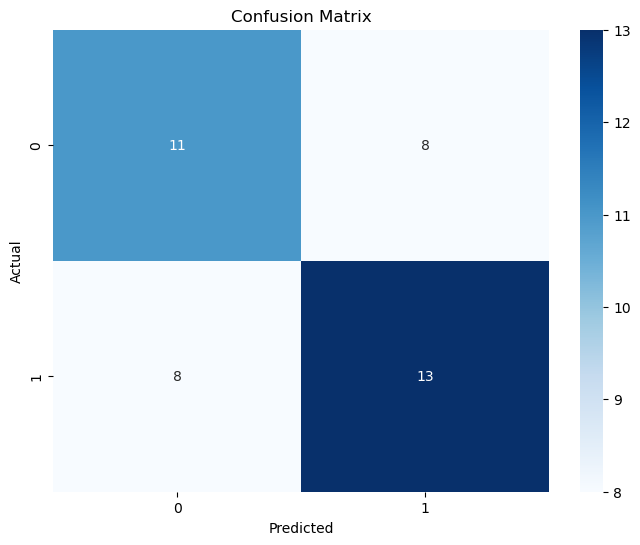

In [201]:
# confusion matrix
cm = confusion_matrix(Ytest, prediksi)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [203]:
# Menampilkan hasil prediksi

print("Aktual:", Ytest)
print("Prediksi:", prediksi)

Aktual: [1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0
 0 1 0]
Prediksi: [0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1
 1 1 1]


In [211]:
data_clean = pd.read_csv('hasil_stemming_stopwords.csv')

In [215]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

# Asumsikan data_clean sudah ada dan berisi kolom 'final_text'
# Jika terdapat NaN pada kolom 'final_text', ganti dengan string kosong
data_clean['final_text'] = data_clean['final_text'].fillna('')

# Proses TF-IDF
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['final_text'].astype('U'))

# Konversi matriks TF-IDF ke array numpy
tfidf_array = text_tf.toarray()

# Hitung similarity cosinus
similarity = np.dot(tfidf_array, tfidf_array.T)

# Hitung norma setiap dokumen
norms = np.sqrt(np.diagonal(similarity))

# Mengatasi masalah pembagian dengan nol dengan mengganti norma yang nol dengan epsilon kecil
norms = np.where(norms == 0, 1e-10, norms)

# Normalisasi similarity (menggunakan norma dari setiap dokumen)
similarity = similarity / norms[:, None] / norms[None, :]

# Tentukan threshold
threshold = 0.5  # Anda bisa mengubah nilai ini sesuai kebutuhan

# Buat matriks adjacency dengan menerapkan threshold
adjacency_matrix = (similarity > threshold).astype(int)

# Hapus self-loops (koneksi dokumen dengan dirinya sendiri)
np.fill_diagonal(adjacency_matrix, 0)

# Konversi ke matriks sparse untuk efisiensi jika diperlukan
adjacency_matrix_sparse = csr_matrix(adjacency_matrix)

print(f"Matriks Adjacency (threshold = {threshold}):")
print(adjacency_matrix)

# Jika Anda ingin melihat matriks sparse
print("\nMatriks Adjacency (Sparse):")
print(adjacency_matrix_sparse)

# Tambahan: Hitung dan tampilkan statistik matriks
total_connections = np.sum(adjacency_matrix)
possible_connections = adjacency_matrix.size - adjacency_matrix.shape[0]  # Kurangi diagonal
density = total_connections / possible_connections

print(f"\nStatistik Matriks Adjacency:")
print(f"Total koneksi: {total_connections}")
print(f"Densitas matriks: {density:.4f}")
print(f"Jumlah dokumen yang terhubung: {np.sum(np.sum(adjacency_matrix, axis=1) > 0)}")


Matriks Adjacency (threshold = 0.5):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]

Matriks Adjacency (Sparse):
  (3, 131)	1
  (4, 22)	1
  (4, 28)	1
  (4, 36)	1
  (4, 41)	1
  (4, 71)	1
  (4, 155)	1
  (4, 159)	1
  (4, 167)	1
  (4, 173)	1
  (4, 193)	1
  (7, 92)	1
  (14, 44)	1
  (16, 120)	1
  (18, 70)	1
  (22, 4)	1
  (22, 33)	1
  (22, 56)	1
  (22, 71)	1
  (22, 106)	1
  (22, 137)	1
  (22, 143)	1
  (22, 150)	1
  (22, 152)	1
  (22, 154)	1
  :	:
  (193, 64)	1
  (193, 71)	1
  (193, 72)	1
  (193, 143)	1
  (193, 150)	1
  (193, 152)	1
  (193, 154)	1
  (193, 155)	1
  (193, 156)	1
  (193, 159)	1
  (193, 161)	1
  (193, 166)	1
  (193, 167)	1
  (193, 171)	1
  (193, 173)	1
  (193, 175)	1
  (193, 183)	1
  (193, 189)	1
  (197, 141)	1
  (197, 184)	1
  (197, 198)	1
  (198, 176)	1
  (198, 177)	1
  (198, 197)	1
  (199, 192)	1

Statistik Matriks Adjacency:
Total koneksi: 432
Densitas matriks: 0.0109
Jumlah dokumen yang terhubung: 88


In [16]:
#Proses Cosine Similarity
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [221]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Memuat data dari file CSV yang berisi kolom 'final_text'
data_clean = pd.read_csv('hasil_stemming_stopwords.csv')

# Jika terdapat NaN pada kolom 'final_text', ganti dengan string kosong
data_clean['final_text'] = data_clean['final_text'].fillna('')

# Proses TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data_clean['final_text'].astype('U'))

# Hitung cosine similarity
cosine_similarity = (tfidf_matrix * tfidf_matrix.T).A  # Menggunakan matriks sparse

# Menampilkan hasil cosine similarity
print("Cosine Similarity Matrix:")
print(cosine_similarity)


Cosine Similarity Matrix:
[[1.         0.00646984 0.00964093 ... 0.02126969 0.0168766  0.04432465]
 [0.00646984 1.         0.00790416 ... 0.01628676 0.00150807 0.00698181]
 [0.00964093 0.00790416 1.         ... 0.00886151 0.03148652 0.00695174]
 ...
 [0.02126969 0.01628676 0.00886151 ... 1.         0.51908508 0.04417253]
 [0.0168766  0.00150807 0.03148652 ... 0.51908508 1.         0.04051061]
 [0.04432465 0.00698181 0.00695174 ... 0.04417253 0.04051061 1.        ]]


In [227]:
pip install python-louvain


  Using cached python-louvain-0.16.tar.gz (204 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



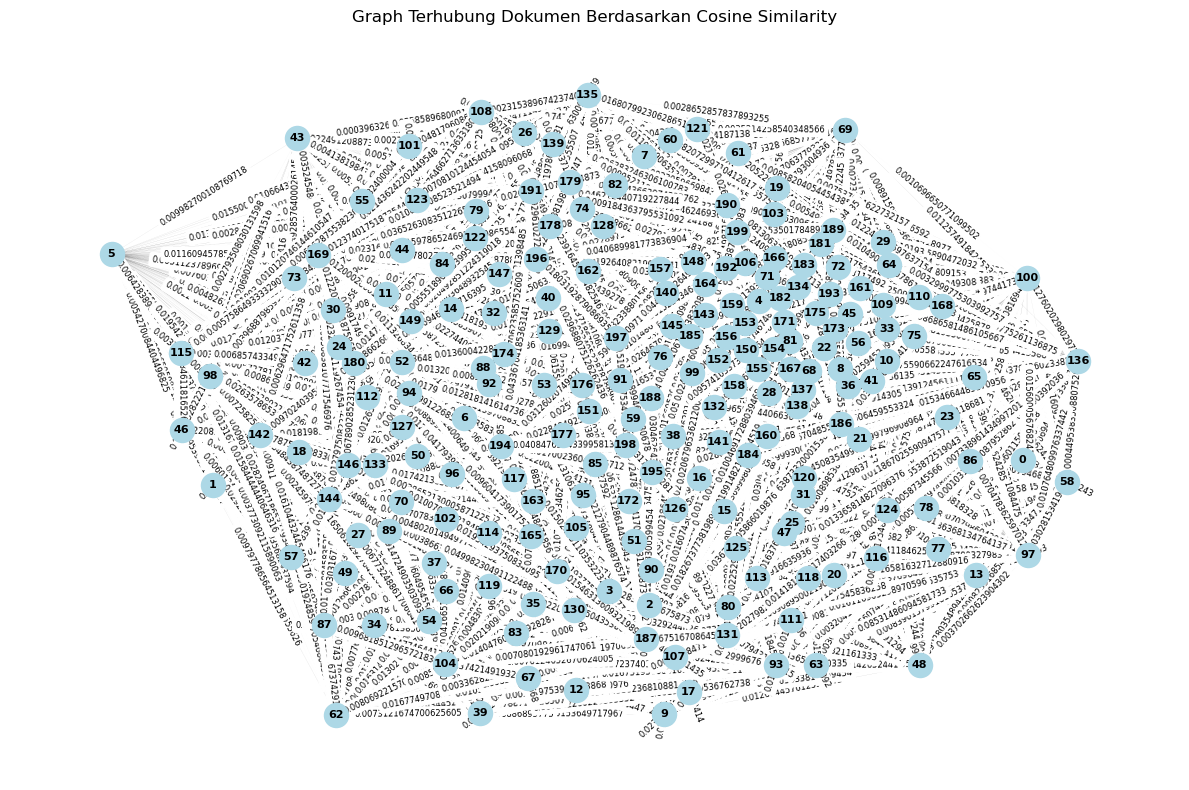

Jumlah node dalam graph: 200
Jumlah edge dalam graph: 19900
Apakah graph terhubung? True
Densitas graph: 1.0000
Module 'community' tidak ditemukan. Instalasi: pip install python-louvain


In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Asumsikan data_clean sudah ada dan berisi kolom 'final_text'
# Jika terdapat NaN pada kolom 'final_text', ganti dengan string kosong
data_clean['final_text'] = data_clean['final_text'].fillna('')

# Fungsi untuk menghitung cosine similarity
def cosine_similarity(X):
    X_normalized = X / np.linalg.norm(X, axis=1)[:, np.newaxis]
    return np.dot(X_normalized, X_normalized.T)

# Proses TF-IDF
tfidf_vectorizer = TfidfVectorizer()
text_tf = tfidf_vectorizer.fit_transform(data_clean['final_text'].astype('U'))
tfidf_array = text_tf.toarray()

# Hitung cosine similarity
similarity_matrix = cosine_similarity(tfidf_array)

# Buat graph dari similarity matrix
G = nx.Graph()

# Tambahkan semua node
for i in range(len(similarity_matrix)):
    G.add_node(i)

# Tambahkan edge dengan weight berdasarkan similarity
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        similarity = similarity_matrix[i, j]
        if similarity > 0:  # hanya tambahkan edge jika similarity lebih besar dari 0
            G.add_edge(i, j, weight=similarity)

# Pastikan graph terhubung dengan menambahkan edge minimum jika diperlukan
if not nx.is_connected(G):
    components = list(nx.connected_components(G))
    for i in range(len(components) - 1):
        node1 = list(components[i])[0]
        node2 = list(components[i+1])[0]
        min_similarity = similarity_matrix[node1, node2]
        G.add_edge(node1, node2, weight=min_similarity)

# Visualisasi graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)  # k parameter untuk menyesuaikan jarak antar node

# Gambar node
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')

# Gambar edge dengan ketebalan berdasarkan weight
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=[w * 3 for w in weights], alpha=0.7)

# Tambahkan label node
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

# Tambahkan label edge (opsional, bisa dikomentari jika terlalu padat)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title('Graph Terhubung Dokumen Berdasarkan Cosine Similarity')
plt.axis('off')
plt.tight_layout()
plt.show()

# Statistik graph
print(f"Jumlah node dalam graph: {G.number_of_nodes()}")
print(f"Jumlah edge dalam graph: {G.number_of_edges()}")
print(f"Apakah graph terhubung? {nx.is_connected(G)}")
print(f"Densitas graph: {nx.density(G):.4f}")

# Identifikasi komunitas (opsional)
try:
    from community import community_louvain
    partition = community_louvain.best_partition(G)
    print(f"Jumlah komunitas terdeteksi: {len(set(partition.values()))}")
except ImportError:
    print("Module 'community' tidak ditemukan. Instalasi: pip install python-louvain")


Top 10 nodes berdasarkan Closeness Centrality:
     Closeness Centrality  Degree Centrality  Betweenness Centrality
0                     1.0                1.0                     0.0
137                   1.0                1.0                     0.0
127                   1.0                1.0                     0.0
128                   1.0                1.0                     0.0
129                   1.0                1.0                     0.0
130                   1.0                1.0                     0.0
131                   1.0                1.0                     0.0
132                   1.0                1.0                     0.0
133                   1.0                1.0                     0.0
134                   1.0                1.0                     0.0

Top 10 nodes berdasarkan Degree Centrality:
     Closeness Centrality  Degree Centrality  Betweenness Centrality
0                     1.0                1.0                     0.0
137        

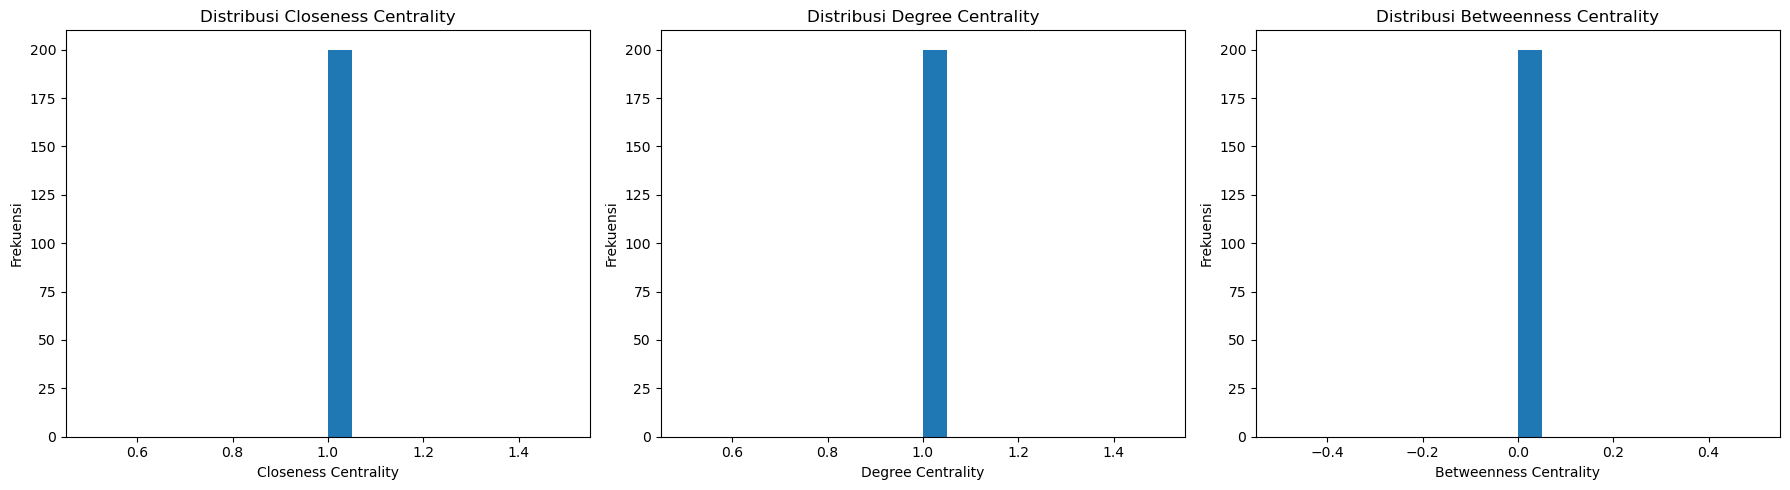


Hasil centrality measures telah disimpan ke 'centrality_measures.csv'

Node dengan Closeness Centrality tertinggi: 0
Node dengan Degree Centrality tertinggi: 0
Node dengan Betweenness Centrality tertinggi: 0


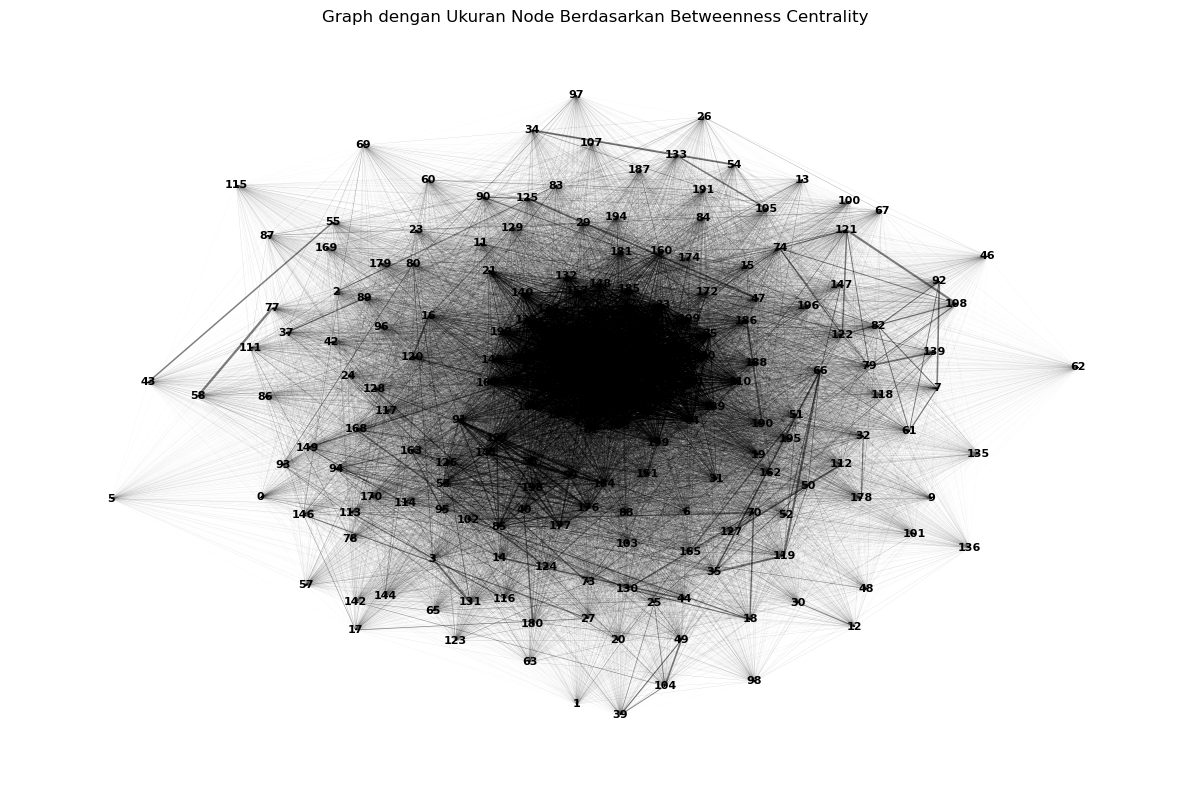

In [229]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan G adalah graph yang sudah dibuat sebelumnya

# Hitung centrality measures
closeness_centrality = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Buat DataFrame untuk menyimpan hasil centrality
centrality_df = pd.DataFrame({
    'Closeness Centrality': closeness_centrality,
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality
})

# Tampilkan 10 node teratas untuk setiap jenis centrality
print("Top 10 nodes berdasarkan Closeness Centrality:")
print(centrality_df.sort_values('Closeness Centrality', ascending=False).head(10))
print("\nTop 10 nodes berdasarkan Degree Centrality:")
print(centrality_df.sort_values('Degree Centrality', ascending=False).head(10))
print("\nTop 10 nodes berdasarkan Betweenness Centrality:")
print(centrality_df.sort_values('Betweenness Centrality', ascending=False).head(10))

# Visualisasi distribusi centrality measures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.hist(centrality_df['Closeness Centrality'], bins=20)
ax1.set_title('Distribusi Closeness Centrality')
ax1.set_xlabel('Closeness Centrality')
ax1.set_ylabel('Frekuensi')

ax2.hist(centrality_df['Degree Centrality'], bins=20)
ax2.set_title('Distribusi Degree Centrality')
ax2.set_xlabel('Degree Centrality')
ax2.set_ylabel('Frekuensi')

ax3.hist(centrality_df['Betweenness Centrality'], bins=20)
ax3.set_title('Distribusi Betweenness Centrality')
ax3.set_xlabel('Betweenness Centrality')
ax3.set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Simpan hasil centrality ke file CSV
centrality_df.to_csv('centrality_measures.csv')
print("\nHasil centrality measures telah disimpan ke 'centrality_measures.csv'")

# Identifikasi node dengan centrality tertinggi
print("\nNode dengan Closeness Centrality tertinggi:", max(closeness_centrality, key=closeness_centrality.get))
print("Node dengan Degree Centrality tertinggi:", max(degree_centrality, key=degree_centrality.get))
print("Node dengan Betweenness Centrality tertinggi:", max(betweenness_centrality, key=betweenness_centrality.get))

# Visualisasi graph dengan ukuran node berdasarkan Betweenness Centrality
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Normalisasi betweenness centrality untuk ukuran node
node_sizes = [v * 5000 for v in betweenness_centrality.values()]

# Gambar node
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.8)

# Gambar edge
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=[w * 2 for w in weights], alpha=0.5)

# Tambahkan label node
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.title('Graph dengan Ukuran Node Berdasarkan Betweenness Centrality')
plt.axis('off')
plt.tight_layout()
plt.show()

#### Link deployment aplikasi di streamlit :

https://klasifikasiberitadohan.streamlit.app/